In [18]:
import pandas as pd

In [14]:
"""
This script processes the Financial PhraseBank dataset and saves the output to a CSV file.

https://huggingface.co/datasets/financial_phrasebank
"""

import csv
import json
import os


def process_file(file_path, confidence_score):
    output_data = []

    with open(file_path, "r", encoding="ISO-8859-1") as file:
        for line in file:
            sentence, sentiment = line.strip().split("@")
            output_data.append((sentence, sentiment))

    return output_data


# Define confidence scores for each agreement level
confidence_scores = {
    "Sentences_AllAgree.txt": 1.0
}

# Set the base folder path
base_folder = "dataset"

# Initialize a list to collect all data
all_output_data = []

# Process the dataset files
for file_name, confidence_score in confidence_scores.items():
    file_path = os.path.join(base_folder, file_name)
    output_data = process_file(file_path, confidence_score)
    all_output_data.extend(output_data)


In [16]:

# Save all the output data to a single CSV file
output_file = os.path.join("dataset/", "All_Sentences_output.csv")
with open(output_file, "w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["sentence", "sentiment"])
    writer.writerows(all_output_data)

In [20]:
dataset=pd.read_csv('dataset/All_Sentences_output.csv')

In [41]:
import requests
import json
import os
import ssl

def allow_self_signed_https(allowed):
    # bypass the server certificate verification on client side
    if allowed and not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None):
        ssl._create_default_https_context = ssl._create_unverified_context

def call_azure_openai(api_key, url, messages, max_tokens=1024, temperature=0.7, top_p=1, stream=False):
    allow_self_signed_https(True) # this line is needed if you use self-signed certificate in your scoring service.
    
    data = {
        "messages": messages,
        "max_tokens": max_tokens,
        "temperature": temperature,
        "top_p": top_p,
        "stream": stream
    }

    headers = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + api_key}
    
    try:
        response = requests.post(url, headers=headers, json=data)
        response.raise_for_status()  # Raise an error for bad status codes
        return response.json()
    except requests.exceptions.HTTPError as error:
        print("The request failed with status code:", error.response.status_code)
        # Print the headers - they include the request ID and the timestamp, which are useful for debugging the failure
        print(error.response.headers)
        print(error.response.text)
        return None

# Example usage:
api_key = '7YZn3ce2PxFNZNCQkcmMd7Vqvu8r9raQ'
url = 'https://Phi-3-mini-4k-instruct-zxqrl-serverless.eastus2.inference.ai.azure.com/v1/chat/completions'
messages = [
    {
        "role": "user",
        "content": "you are an ai assistant for detecting sentiment from a given input text, only respond with [neutral, positive, or negative]"
    },
    {
        "role": "user",
        "content": "- Inge Larsen (CFO), 29,045 shares , representing 0.50 % of the share capital ."
    }
]

result = call_azure_openai(api_key, url, messages)['choices'][0]['message']['content'].strip()
print(result)


neutral


In [67]:
results=[]
for index,row in dataset.iterrows():
    if True:
        zero_shot_messages = [
    {
        "role": "user",
        "content": "you are an ai assistant for detecting sentitiment from a given input text, only respond with neutral, positive or negative, nothing else"
    },
    
    {
        "role": "user",
        "content": f"{row['sentence']}"
    }]
        zero_shot_result = call_azure_openai(api_key, url, messages)['choices'][0]['message']['content'].strip().lower()
        single_shot_messages = [
    {
        "role": "user",
        "content": "you are an ai assistant for detecting sentitiment from a given input text, only respond with neutral, positive or negative, nothing else"
    },
    {
        "role": "user",
        "content": "The company expects net sales to significantly increase from 2009"
    },
    {
        "role": "assistant",
        "content": "positive"
    },
    {
        "role": "user",
        "content": "The forecast for 2012 is 3.3 %"
    },
    {
        "role": "assistant",
        "content": "neutral"
    },
    {
        "role": "user",
        "content": "Finnish media group Talentum has issued a profit warning"
    },
    {
        "role": "assistant",
        "content": "negative"
    },
    {
        "role": "user",
        "content": f"{row['sentence']}"
    },
    ]
        

        few_shot_messages = [
            {
                "role": "user",
                "content": "you are an ai assistant for detecting sentiment from a given input text, only respond with neutral, positive or negative, nothing else"
            },
            # Positive examples
            {
                "role": "user",
                "content": "The company's net profit increased by 20% year-over-year"
            },
            {
                "role": "assistant",
                "content": "positive"
            },
            {
                "role": "user",
                "content": "Quarterly earnings exceeded analysts' forecasts by 15%"
            },
            {
                "role": "assistant",
                "content": "positive"
            },
            {
                "role": "user",
                "content": "The company announced a successful product launch with higher than expected revenue"
            },
            {
                "role": "assistant",
                "content": "positive"
            },
            # Neutral examples
            {
                "role": "user",
                "content": "The financial report was filed with the SEC"
            },
            {
                "role": "assistant",
                "content": "neutral"
            },
            {
                "role": "user",
                "content": "The company's annual general meeting will be held next week"
            },
            {
                "role": "assistant",
                "content": "neutral"
            },
            {
                "role": "user",
                "content": "The latest stock price is $50 per share"
            },
            {
                "role": "assistant",
                "content": "neutral"
            },
            # Negative examples
            {
                "role": "user",
                "content": "The company reported a 15% drop in revenue this quarter"
            },
            {
                "role": "assistant",
                "content": "negative"
            },
            {
                "role": "user",
                "content": "There was a significant decline in the company's stock value over the past month"
            },
            {
                "role": "assistant",
                "content": "negative"
            },
            {
                "role": "user",
                "content": "The company issued a profit warning for the next quarter"
            },
            {
                "role": "assistant",
                "content": "negative"
            },
            {
                "role": "user",
                "content": f"{row['sentence']}"
            }
        ]
        single_shot_result = call_azure_openai(api_key, url, single_shot_messages)['choices'][0]['message']['content'].strip().lower()

        few_shot_result = call_azure_openai(api_key, url, few_shot_messages)['choices'][0]['message']['content'].strip().lower()

        results.append([index,row['sentiment'],zero_shot_result,single_shot_result,few_shot_result])
        

ConnectionError: HTTPSConnectionPool(host='phi-3-mini-4k-instruct-zxqrl-serverless.eastus2.inference.ai.azure.com', port=443): Max retries exceeded with url: /v1/chat/completions (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x155e71700>: Failed to resolve 'phi-3-mini-4k-instruct-zxqrl-serverless.eastus2.inference.ai.azure.com' ([Errno 8] nodename nor servname provided, or not known)"))

In [64]:
pd.DataFrame(results,columns=["index","sentiment","zero_shot","single_shot","few_shot"]).to_csv("results.csv",index=None)

   index sentiment zero_shot single_shot  few_shot
0      0   neutral  positive     neutral   neutral
1      1  positive   neutral    positive  negative
2      2  positive   neutral    positive  positive
3      3  positive   neutral    positive  positive
4      4  positive  positive    positive  positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        20 non-null     int64 
 1   sentiment    20 non-null     object
 2   zero_shot    20 non-null     object
 3   single_shot  20 non-null     object
 4   few_shot     20 non-null     object
dtypes: int64(1), object(4)
memory usage: 928.0+ bytes
None
Metrics for zero_shot:
Accuracy: 0.30
Precision: 0.81
Recall: 0.30
F1: 0.44

Metrics for single_shot:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1: 1.00

Metrics for few_shot:
Accuracy: 0.90
Precision: 1.00
Recall: 0.90
F1: 0.95



/Users/joinalahmed/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


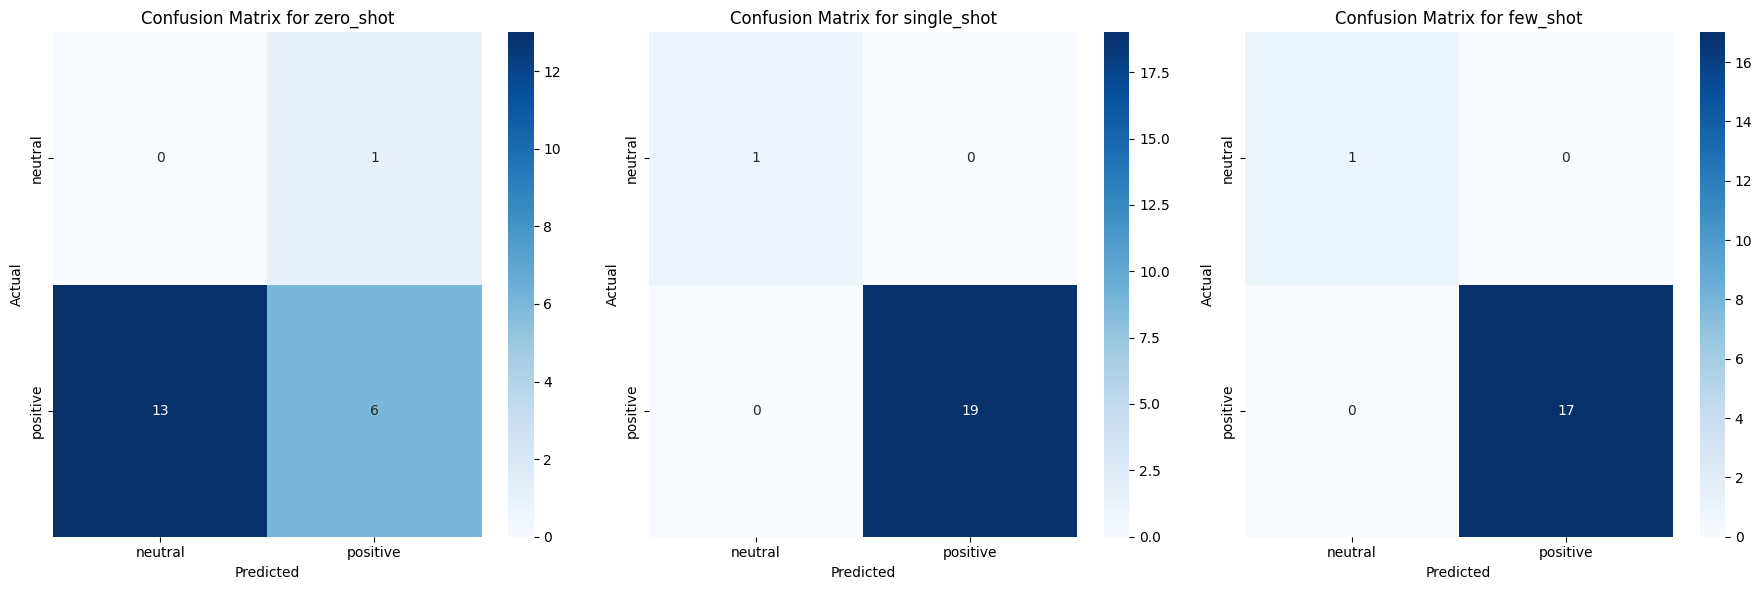

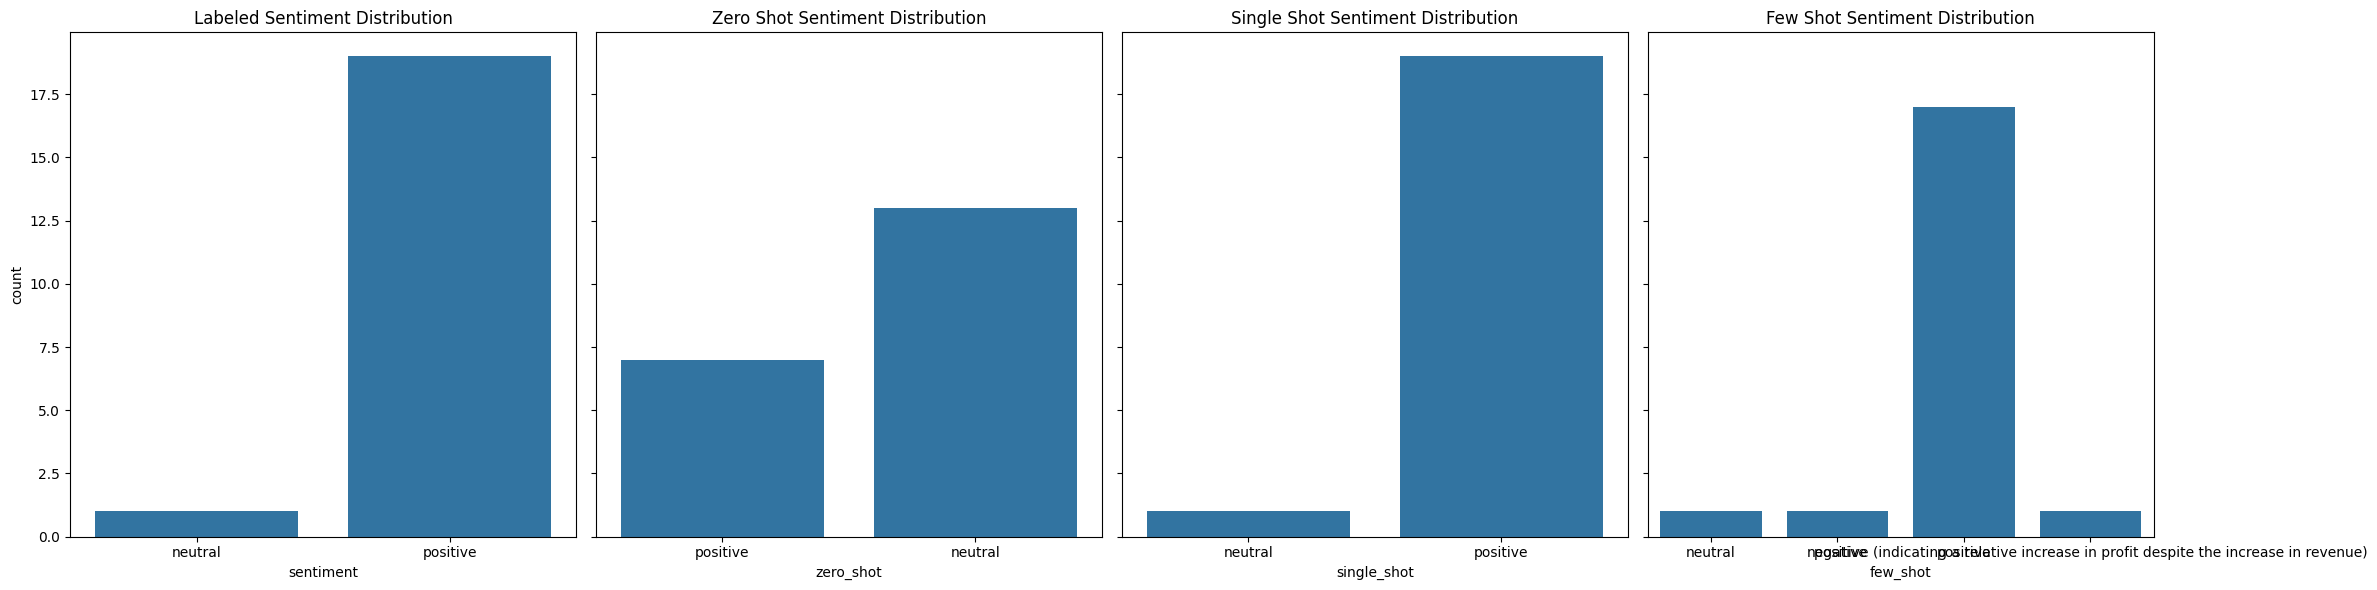

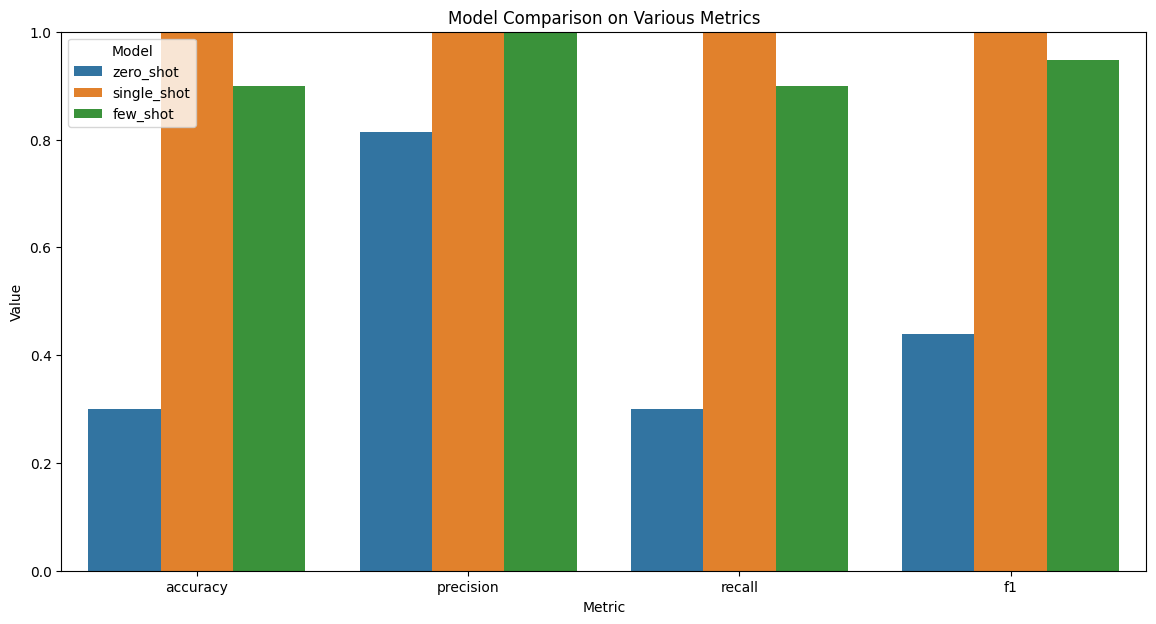

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

# Load the data
df = pd.read_csv('results.csv')


# Basic Data Check
print(df.head())
print(df.info())

# Ensure data types are appropriate
df['sentiment'] = df['sentiment'].astype(str)
df['zero_shot'] = df['zero_shot'].astype(str)
df['single_shot'] = df['single_shot'].astype(str)
df['few_shot'] = df['few_shot'].astype(str)

# Calculate accuracy, precision, recall, and F1-score for each model
metrics = {}
for model in ['zero_shot', 'single_shot', 'few_shot']:
    accuracy = accuracy_score(df['sentiment'], df[model])
    precision, recall, f1, _ = precision_recall_fscore_support(df['sentiment'], df[model], average='weighted')
    metrics[model] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}

# Print the metrics
for model, scores in metrics.items():
    print(f"Metrics for {model}:")
    for metric, score in scores.items():
        print(f"{metric.capitalize()}: {score:.2f}")
    print()

# Confusion Matrix
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, model in enumerate(['zero_shot', 'single_shot', 'few_shot']):
    cm = confusion_matrix(df['sentiment'], df[model], labels=df['sentiment'].unique())
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['sentiment'].unique(), yticklabels=df['sentiment'].unique(), ax=axes[i])
    axes[i].set_title(f'Confusion Matrix for {model}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Distribution of sentiment predictions
fig, axes = plt.subplots(1, 4, figsize=(24, 6), sharey=True)
sns.countplot(x='sentiment', data=df, ax=axes[0])
axes[0].set_title('Labeled Sentiment Distribution')
sns.countplot(x='zero_shot', data=df, ax=axes[1])
axes[1].set_title('Zero Shot Sentiment Distribution')
sns.countplot(x='single_shot', data=df, ax=axes[2])
axes[2].set_title('Single Shot Sentiment Distribution')
sns.countplot(x='few_shot', data=df, ax=axes[3])
axes[3].set_title('Few Shot Sentiment Distribution')

plt.tight_layout()
plt.show()

# Bar plots for accuracy, precision, recall, and F1-score
metrics_df = pd.DataFrame(metrics).T.reset_index().melt(id_vars='index')
metrics_df.columns = ['Model', 'Metric', 'Value']
plt.figure(figsize=(14, 7))
sns.barplot(x='Metric', y='Value', hue='Model', data=metrics_df)
plt.title('Model Comparison on Various Metrics')
plt.ylim(0, 1)
plt.show()


In [103]:
import requests
import json,re
import os
import ssl
from sklearn.metrics import precision_score, recall_score, f1_score
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

def allow_self_signed_https(allowed):
    if allowed and not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None):
        ssl._create_default_https_context = ssl._create_unverified_context

def call_azure_openai(api_key, url, messages, max_tokens=1024, temperature=0.7, top_p=1, stream=False):
    allow_self_signed_https(True) # this line is needed if you use self-signed certificate in your scoring service.
    
    data = {
        "messages": messages,
        "max_tokens": max_tokens,
        "temperature": temperature,
        "top_p": top_p,
        "stream": stream
    }

    headers = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + api_key}
    
    try:
        response = requests.post(url, headers=headers, json=data)
        response.raise_for_status()  # Raise an error for bad status codes
        return response.json()
    except requests.exceptions.HTTPError as error:
        print("The request failed with status code:", error.response.status_code)
        print(error.response.headers)
        print(error.response.text)
        return None

api_key = '7YZn3ce2PxFNZNCQkcmMd7Vqvu8r9raQ'
url = 'https://Phi-3-mini-4k-instruct-zxqrl-serverless.eastus2.inference.ai.azure.com/v1/chat/completions'

dataset = [
    {
        "input": """The Ferrari Financial Regulation document outlines the rules and guidelines for power units in the racing championship.
                    It covers topics such as cost caps, manufacturing costs, and capital expenditure limits.""",
        "expected_output": {
            "Company names": "Ferrari",
            "People names": "None",
            "Specific topics": "power units, cost caps, manufacturing costs, capital expenditure limits",
            "General themes": "financial regulation, racing championship"
        }
    },
    {
        "input": """Apple Inc. has announced that Tim Cook will remain as the CEO for the next five years. The announcement was made at the company's annual general meeting.""",
        "expected_output": {
            "Company names": "Apple Inc.",
            "People names": "Tim Cook",
            "Specific topics": "CEO, annual general meeting",
            "General themes": "company leadership, executive announcements"
        }
    },
    {
        "input": """Elon Musk, the CEO of Tesla, has unveiled the latest Cybertruck model at the company's headquarters in Palo Alto.""",
        "expected_output": {
            "Company names": "Tesla",
            "People names": "Elon Musk",
            "Specific topics": "Cybertruck model, headquarters, Palo Alto",
            "General themes": "product unveiling, automotive industry"
        }
    },
    {
        "input": """Microsoft and Google have partnered to work on a new AI project focused on natural language processing. The project will involve researchers from both companies.""",
        "expected_output": {
            "Company names": "Microsoft, Google",
            "People names": "None",
            "Specific topics": "AI project, natural language processing, researchers",
            "General themes": "technology collaboration, artificial intelligence"
        }
    },
    {
        "input": """The SpaceX Mars mission is set to launch in 2026. Elon Musk stated that the mission will mark a significant milestone in space exploration.""",
        "expected_output": {
            "Company names": "SpaceX",
            "People names": "Elon Musk",
            "Specific topics": "Mars mission, 2026, space exploration",
            "General themes": "space missions, future space exploration"
        }
    },
    {
        "input": """Amazon has released its latest earnings report, showing a significant increase in revenue. Jeff Bezos commented on the company's performance during a press conference.""",
        "expected_output": {
            "Company names": "Amazon",
            "People names": "Jeff Bezos",
            "Specific topics": "earnings report, revenue increase, press conference",
            "General themes": "financial performance, company earnings"
        }
    },
    {
        "input": """The World Health Organization (WHO) has published a report on the global impact of the COVID-19 pandemic. The report includes data on infection rates, vaccination efforts, and economic effects.""",
        "expected_output": {
            "Company names": "World Health Organization (WHO)",
            "People names": "None",
            "Specific topics": "COVID-19 pandemic, infection rates, vaccination efforts, economic effects",
            "General themes": "global health, pandemic impact"
        }
    },
    {
        "input": """Google's Sundar Pichai discussed the future of AI technology at the annual Google I/O conference. He highlighted advancements in machine learning and AI ethics.""",
        "expected_output": {
            "Company names": "Google",
            "People names": "Sundar Pichai",
            "Specific topics": "AI technology, Google I/O conference, machine learning, AI ethics",
            "General themes": "technology conference, AI advancements"
        }
    },
    {
        "input": """The United Nations Climate Change Conference focused on reducing carbon emissions and promoting sustainable energy solutions. Various global leaders participated in the event.""",
        "expected_output": {
            "Company names": "United Nations",
            "People names": "None",
            "Specific topics": "Climate Change Conference, carbon emissions, sustainable energy solutions",
            "General themes": "climate change, sustainability"
        }
    },
    {
        "input": """Bill Gates has published a new book titled 'How to Avoid a Climate Disaster'. The book outlines strategies for reducing greenhouse gas emissions and combating climate change.""",
        "expected_output": {
            "Company names": "None",
            "People names": "Bill Gates",
            "Specific topics": "new book, How to Avoid a Climate Disaster, greenhouse gas emissions, climate change",
            "General themes": "environmental strategies, climate action"
        }
    }
]




dataset = [
    {
        "input": """Tesla reported record-breaking earnings for Q1 2024, with significant revenue growth attributed to high demand for the new Model Y. Elon Musk highlighted the company's innovative strategies in a recent investor call.""",
        "expected_output": {
            "Company names": "Tesla",
            "People names": "Elon Musk",
            "Specific topics": "record-breaking earnings, revenue growth, Model Y, investor call",
            "General themes": "financial performance, automotive innovation"
        }
    },
    {
        "input": """Microsoft has announced a major acquisition of a cybersecurity firm to enhance its cloud services. Satya Nadella emphasized the importance of cybersecurity in the company's future growth strategy.""",
        "expected_output": {
            "Company names": "Microsoft",
            "People names": "Satya Nadella",
            "Specific topics": "acquisition, cybersecurity, cloud services",
            "General themes": "business expansion, cybersecurity"
        }
    },
    {
        "input": """Apple Inc. is launching a new financial service that aims to integrate seamlessly with its existing ecosystem. Tim Cook discussed the potential impact on consumer behavior in a recent press release.""",
        "expected_output": {
            "Company names": "Apple Inc.",
            "People names": "Tim Cook",
            "Specific topics": "new financial service, ecosystem integration, consumer behavior",
            "General themes": "financial innovation, consumer technology"
        }
    },
    {
        "input": """Google has introduced a new advertising platform designed to increase revenue for small businesses. The platform uses advanced algorithms to optimize ad placements, according to a company announcement.""",
        "expected_output": {
            "Company names": "Google",
            "People names": "None",
            "Specific topics": "advertising platform, revenue increase, advanced algorithms",
            "General themes": "digital advertising, small business support"
        }
    },
    {
        "input": """Amazon's latest quarterly report shows an increase in profitability, driven by strong performance in its cloud computing division. Jeff Bezos commented on the company's strategic focus during an earnings call.""",
        "expected_output": {
            "Company names": "Amazon",
            "People names": "Jeff Bezos",
            "Specific topics": "quarterly report, profitability, cloud computing division, earnings call",
            "General themes": "financial results, cloud services"
        }
    },
    {
        "input": """Facebook is investing heavily in virtual reality technology, with plans to develop new products aimed at enhancing user engagement. Mark Zuckerberg detailed these plans in a recent keynote speech.""",
        "expected_output": {
            "Company names": "Facebook",
            "People names": "Mark Zuckerberg",
            "Specific topics": "virtual reality technology, new products, user engagement",
            "General themes": "technology investment, user experience"
        }
    },
    {
        "input": """Netflix has reported a decline in subscriber growth due to increased competition in the streaming market. The company's CFO, Spencer Neumann, provided insights into the strategic response during the latest earnings report.""",
        "expected_output": {
            "Company names": "Netflix",
            "People names": "Spencer Neumann",
            "Specific topics": "decline in subscriber growth, streaming competition, earnings report",
            "General themes": "market competition, financial challenges"
        }
    },
    {
        "input": """Alibaba's recent financial report reveals a boost in revenue from its e-commerce platform, driven by a surge in online shopping. The company's CEO, Daniel Zhang, highlighted key growth areas in the report.""",
        "expected_output": {
            "Company names": "Alibaba",
            "People names": "Daniel Zhang",
            "Specific topics": "revenue boost, e-commerce platform, online shopping",
            "General themes": "e-commerce growth, financial success"
        }
    },
    {
        "input": """The International Monetary Fund (IMF) has revised its global economic outlook, forecasting slower growth due to geopolitical tensions and trade disputes. The report includes updated projections and analysis.""",
        "expected_output": {
            "Company names": "International Monetary Fund (IMF)",
            "People names": "None",
            "Specific topics": "economic outlook, geopolitical tensions, trade disputes",
            "General themes": "global economy, financial forecasts"
        }
    },
    {
        "input": """The European Central Bank (ECB) is considering new monetary policies to address inflation concerns. The upcoming policy changes are expected to impact financial markets and borrowing costs.""",
        "expected_output": {
            "Company names": "European Central Bank (ECB)",
            "People names": "None",
            "Specific topics": "monetary policies, inflation concerns, financial markets",
            "General themes": "economic policy, inflation management"
        }
    },
    {
        "input": """Goldman Sachs has launched a new investment fund focused on sustainable energy projects. The fund aims to attract investors interested in green technologies and environmental impact.""",
        "expected_output": {
            "Company names": "Goldman Sachs",
            "People names": "None",
            "Specific topics": "investment fund, sustainable energy projects, green technologies",
            "General themes": "investment opportunities, environmental sustainability"
        }
    },
    {
        "input": """JPMorgan Chase is expanding its digital banking services to cater to a growing number of online customers. Jamie Dimon outlined the strategic initiatives in the company's latest financial update.""",
        "expected_output": {
            "Company names": "JPMorgan Chase",
            "People names": "Jamie Dimon",
            "Specific topics": "digital banking services, online customers, strategic initiatives",
            "General themes": "banking innovation, customer service"
        }
    },
    {
        "input": """Visa has introduced a new payment system designed to streamline transactions and enhance security for online purchases. The system was demonstrated at a recent tech conference.""",
        "expected_output": {
            "Company names": "Visa",
            "People names": "None",
            "Specific topics": "payment system, online transactions, security",
            "General themes": "payment technology, financial security"
        }
    },
    {
        "input": """Walmart's latest annual report highlights a significant increase in sales due to its expansion into new markets. Doug McMillon, the company's CEO, discussed the growth strategy in a press briefing.""",
        "expected_output": {
            "Company names": "Walmart",
            "People names": "Doug McMillon",
            "Specific topics": "annual report, sales increase, market expansion",
            "General themes": "retail growth, business strategy"
        }
    },
    {
        "input": """The Bank of England has raised interest rates to combat rising inflation. The decision was made in response to recent economic data and is expected to impact borrowing and investment decisions.""",
        "expected_output": {
            "Company names": "Bank of England",
            "People names": "None",
            "Specific topics": "interest rates, inflation, economic data",
            "General themes": "monetary policy, inflation control"
        }
    },
    {
        "input": """Uber Technologies has announced a new strategic partnership with a major logistics company to improve its delivery services. The partnership aims to optimize supply chain efficiency.""",
        "expected_output": {
            "Company names": "Uber Technologies",
            "People names": "None",
            "Specific topics": "strategic partnership, logistics company, delivery services",
            "General themes": "business collaboration, supply chain optimization"
        }
    },
    {
        "input": """Twitter has reported a decrease in advertising revenue due to changes in its user base and ad targeting capabilities. The company's CFO discussed potential recovery strategies in a recent financial report.""",
        "expected_output": {
            "Company names": "Twitter",
            "People names": "None",
            "Specific topics": "advertising revenue, user base, ad targeting",
            "General themes": "revenue challenges, advertising strategies"
        }
    },
    {
        "input": """Intel Corporation has unveiled a new series of processors aimed at improving performance for high-end computing tasks. The launch was announced at the company's annual tech event.""",
        "expected_output": {
            "Company names": "Intel Corporation",
            "People names": "None",
            "Specific topics": "new processors, high-end computing, tech event",
            "General themes": "technology innovation, performance enhancement"
        }
    },
    {
        "input": """Boeing's latest financial report indicates a recovery in aircraft deliveries following a challenging year. The company's CEO, David Calhoun, highlighted the improvements during an earnings call.""",
        "expected_output": {
            "Company names": "Boeing",
            "People names": "David Calhoun",
            "Specific topics": "aircraft deliveries, financial report, earnings call",
            "General themes": "industry recovery, business performance"
        }
    },
    {
        "input": """Oracle has launched a new suite of cloud-based applications designed to enhance enterprise resource planning. The announcement was made during the company's annual user conference.""",
        "expected_output": {
            "Company names": "Oracle",
            "People names": "None",
            "Specific topics": "cloud-based applications, enterprise resource planning, user conference",
            "General themes": "cloud computing, enterprise solutions"
        }
    },
    {
        "input": """Johnson & Johnson has received approval from the FDA for a new cancer treatment drug. The company expects the drug to significantly improve patient outcomes.""",
        "expected_output": {
            "Company names": "Johnson & Johnson",
            "People names": "None",
            "Specific topics": "FDA approval, cancer treatment drug, patient outcomes",
            "General themes": "medical advancements, pharmaceutical industry"
        }
    },
    {
        "input": """HSBC is restructuring its global operations to reduce costs and increase efficiency. The bank's CEO outlined the key changes in a recent investor meeting.""",
        "expected_output": {
            "Company names": "HSBC",
            "People names": "None",
            "Specific topics": "restructuring, global operations, cost reduction, efficiency",
            "General themes": "corporate strategy, financial management"
        }
    },
    {
        "input": """Disney has announced plans to launch a new streaming service aimed at families. Bob Chapek, the company's CEO, discussed the strategic move during a media event.""",
        "expected_output": {
            "Company names": "Disney",
            "People names": "Bob Chapek",
            "Specific topics": "new streaming service, families, strategic move",
            "General themes": "media industry, digital entertainment"
        }
    },
    {
        "input": """General Electric (GE) has reported an increase in renewable energy investments, focusing on wind and solar power projects. The company's latest sustainability report outlines these initiatives.""",
        "expected_output": {
            "Company names": "General Electric (GE)",
            "People names": "None",
            "Specific topics": "renewable energy investments, wind power, solar power, sustainability report",
            "General themes": "sustainable energy, corporate sustainability"
        }
    },
    {
        "input": """Pfizer has entered into a partnership with BioNTech to develop a new vaccine. The collaboration aims to accelerate research and development efforts in the pharmaceutical industry.""",
        "expected_output": {
            "Company names": "Pfizer, BioNTech",
            "People names": "None",
            "Specific topics": "partnership, new vaccine, research and development",
            "General themes": "pharmaceutical collaboration, vaccine development"
        }
    },
    {
        "input": """Samsung has unveiled its latest line of smartphones, featuring advanced camera technology and 5G capabilities. The launch event showcased the company's technological innovations.""",
        "expected_output": {
            "Company names": "Samsung",
            "People names": "None",
            "Specific topics": "latest smartphones, advanced camera technology, 5G capabilities, launch event",
            "General themes": "technology innovation, mobile industry"
        }
    },
    {
        "input": """Nike has reported a decline in sales due to supply chain disruptions caused by the pandemic. The company's CFO outlined recovery strategies during an earnings call.""",
        "expected_output": {
            "Company names": "Nike",
            "People names": "None",
            "Specific topics": "decline in sales, supply chain disruptions, pandemic, earnings call",
            "General themes": "financial challenges, supply chain management"
        }
    },
    {
        "input": """Adobe has announced a new suite of creative tools designed for digital artists. The announcement was made at the company's annual Adobe MAX conference.""",
        "expected_output": {
            "Company names": "Adobe",
            "People names": "None",
            "Specific topics": "new creative tools, digital artists, Adobe MAX conference",
            "General themes": "creative technology, digital art"
        }
    },
    {
        "input": """Ryanair is expanding its fleet with the purchase of new Boeing 737 MAX aircraft. The airline's CEO, Michael O'Leary, discussed the expansion plans during a press conference.""",
        "expected_output": {
            "Company names": "Ryanair, Boeing",
            "People names": "Michael O'Leary",
            "Specific topics": "fleet expansion, Boeing 737 MAX, press conference",
            "General themes": "aviation industry, business expansion"
        }
    },
    {
        "input": """IBM has launched a new quantum computing initiative aimed at solving complex scientific problems. The initiative was introduced during the company's THINK conference.""",
        "expected_output": {
            "Company names": "IBM",
            "People names": "None",
            "Specific topics": "quantum computing initiative, complex scientific problems, THINK conference",
            "General themes": "scientific research, advanced technology"
        }
    }
]





In [113]:
dataset=[
    {
        "input": """The latest report by Goldman Sachs highlights a significant shift in the global financial markets, predicting a rise in interest rates across major economies. The report includes detailed analysis of market trends, inflation rates, and central bank policies.""",
        "expected_output": {
            "Company names": "Goldman Sachs",
            "People names": "None",
            "Specific topics": "global financial markets, interest rates, major economies, market trends, inflation rates, central bank policies",
            "General themes": "financial analysis, market predictions"
        }
    },
    {
        "input": """During a keynote speech at the World Economic Forum, Christine Lagarde, President of the European Central Bank, discussed the future of monetary policy in the Eurozone. She emphasized the importance of digital currencies and the need for regulatory frameworks.""",
        "expected_output": {
            "Company names": "European Central Bank",
            "People names": "Christine Lagarde",
            "Specific topics": "keynote speech, World Economic Forum, monetary policy, Eurozone, digital currencies, regulatory frameworks",
            "General themes": "economic policy, digital finance"
        }
    },
    {
        "input": """Tesla's latest earnings report shows a record profit, driven by strong sales of electric vehicles in the Asian market. Elon Musk, CEO of Tesla, attributed the success to advancements in battery technology and strategic market expansion.""",
        "expected_output": {
            "Company names": "Tesla",
            "People names": "Elon Musk",
            "Specific topics": "earnings report, record profit, electric vehicles, Asian market, battery technology, strategic market expansion",
            "General themes": "financial performance, technological advancement"
        }
    },
    {
        "input": """A recent study by the Harvard Business Review explores the impact of remote work on productivity and employee well-being. The study surveys thousands of workers from various industries, providing insights into the benefits and challenges of telecommuting.""",
        "expected_output": {
            "Company names": "Harvard Business Review",
            "People names": "None",
            "Specific topics": "remote work, productivity, employee well-being, telecommuting, benefits and challenges",
            "General themes": "workplace trends, employee health"
        }
    },
    {
        "input": """Microsoft and Amazon Web Services have announced a strategic alliance to develop new cloud computing solutions for the healthcare sector. The partnership aims to leverage AI and machine learning to improve patient care and operational efficiency.""",
        "expected_output": {
            "Company names": "Microsoft, Amazon Web Services",
            "People names": "None",
            "Specific topics": "strategic alliance, cloud computing solutions, healthcare sector, AI, machine learning, patient care, operational efficiency",
            "General themes": "technology collaboration, healthcare innovation"
        }
    },
    {
        "input": """The International Monetary Fund (IMF) has revised its global economic forecast, citing the ongoing trade tensions between the US and China. The updated forecast predicts slower growth for the world's major economies.""",
        "expected_output": {
            "Company names": "International Monetary Fund (IMF)",
            "People names": "None",
            "Specific topics": "global economic forecast, trade tensions, US and China, slower growth, major economies",
            "General themes": "economic outlook, international trade"
        }
    },
    {
        "input": """Apple Inc. has unveiled its latest iPhone model, featuring advanced camera systems and a new A15 Bionic chip. Tim Cook, CEO of Apple, highlighted the phone's innovative features during the product launch event.""",
        "expected_output": {
            "Company names": "Apple Inc.",
            "People names": "Tim Cook",
            "Specific topics": "latest iPhone model, advanced camera systems, A15 Bionic chip, product launch event",
            "General themes": "technology innovation, product launch"
        }
    },
    {
        "input": """The United Nations has released a report on climate change, warning of severe environmental impacts if immediate action is not taken. The report includes data on rising global temperatures, sea-level rise, and increased frequency of extreme weather events.""",
        "expected_output": {
            "Company names": "United Nations",
            "People names": "None",
            "Specific topics": "climate change report, environmental impacts, rising global temperatures, sea-level rise, extreme weather events",
            "General themes": "environmental sustainability, global warming"
        }
    },
    {
        "input": """Google has announced a major update to its search algorithm, aimed at improving the accuracy and relevance of search results. Sundar Pichai, CEO of Google, explained the technical improvements during a press briefing.""",
        "expected_output": {
            "Company names": "Google",
            "People names": "Sundar Pichai",
            "Specific topics": "search algorithm update, accuracy and relevance, search results, technical improvements, press briefing",
            "General themes": "technology enhancement, internet search"
        }
    },
    {
        "input": """Amazon has reported a significant increase in sales during the holiday season, driven by a surge in online shopping. Jeff Bezos, founder of Amazon, discussed the company's performance and future growth strategies in a recent interview.""",
        "expected_output": {
            "Company names": "Amazon",
            "People names": "Jeff Bezos",
            "Specific topics": "increase in sales, holiday season, online shopping, company performance, future growth strategies",
            "General themes": "e-commerce trends, business growth"
        }
    },
    {
        "input": """Pfizer and Moderna have announced the development of new booster shots to combat emerging variants of the COVID-19 virus. The pharmaceutical companies aim to distribute the boosters globally by the end of the year.""",
        "expected_output": {
            "Company names": "Pfizer, Moderna",
            "People names": "None",
            "Specific topics": "booster shots, COVID-19 variants, development and distribution",
            "General themes": "public health, vaccine development"
        }
    },
    {
        "input": """A Bloomberg report indicates that Facebook is planning to rebrand itself to reflect its focus on building the metaverse. Mark Zuckerberg, CEO of Facebook, is expected to make the announcement at the upcoming Connect conference.""",
        "expected_output": {
            "Company names": "Facebook",
            "People names": "Mark Zuckerberg",
            "Specific topics": "rebranding, metaverse, Connect conference",
            "General themes": "corporate strategy, digital innovation"
        }
    },
    {
        "input": """The European Union has introduced new regulations aimed at reducing carbon emissions from heavy industries. The regulations will require companies to adopt cleaner technologies and report their emissions annually.""",
        "expected_output": {
            "Company names": "European Union",
            "People names": "None",
            "Specific topics": "new regulations, carbon emissions, heavy industries, cleaner technologies, annual reporting",
            "General themes": "environmental regulation, sustainable practices"
        }
    },
    {
        "input": """Alibaba has announced plans to expand its e-commerce operations in Southeast Asia. The company's strategy includes significant investments in logistics and local partnerships to enhance market penetration.""",
        "expected_output": {
            "Company names": "Alibaba",
            "People names": "None",
            "Specific topics": "e-commerce expansion, Southeast Asia, investments in logistics, local partnerships, market penetration",
            "General themes": "business expansion, international markets"
        }
    },
    {
        "input": """IBM has revealed a new quantum computer capable of solving complex problems that are currently beyond the reach of classical computers. The breakthrough was announced at the company's annual THINK conference.""",
        "expected_output": {
            "Company names": "IBM",
            "People names": "None",
            "Specific topics": "quantum computer, complex problems, classical computers, THINK conference",
            "General themes": "technological innovation, computing advancements"
        }
    },
    {
        "input": """Nike's latest marketing campaign focuses on sustainability and eco-friendly products. The campaign features athletes promoting Nike's new line of shoes made from recycled materials.""",
        "expected_output": {
            "Company names": "Nike",
            "People names": "None",
            "Specific topics": "marketing campaign, sustainability, eco-friendly products, athletes, recycled materials",
            "General themes": "corporate social responsibility, sustainable fashion"
        }
    },
    {
        "input": """The World Bank has approved a $500 million loan to support infrastructure development in developing countries. The funding will be used to build roads, schools, and healthcare facilities.""",
        "expected_output": {
            "Company names": "World Bank",
            "People names": "None",
            "Specific topics": "infrastructure development, developing countries, $500 million loan, roads, schools, healthcare facilities",
            "General themes": "international aid, development projects"
        }
    },
    {
        "input": """Intel has announced the construction of a new semiconductor manufacturing plant in Arizona. The facility is expected to create thousands of jobs and boost the local economy.""",
        "expected_output": {
            "Company names": "Intel",
            "People names": "None",
            "Specific topics": "semiconductor manufacturing plant, Arizona, job creation, local economy",
            "General themes": "economic development, technology manufacturing"
        }
    },
    {
        "input": """Uber has launched a new service called Uber Green, which allows users to request electric and hybrid vehicles. The initiative is part of Uber's commitment to reducing its carbon footprint.""",
        "expected_output": {
            "Company names": "Uber",
            "People names": "None",
            "Specific topics": "Uber Green, electric and hybrid vehicles, carbon footprint reduction",
            "General themes": "sustainable transportation, corporate responsibility"
        }
    },
    {
        "input": """Walmart has partnered with the US government to distribute COVID-19 vaccines at its pharmacies nationwide. The collaboration aims to increase vaccine accessibility and accelerate the immunization process.""",
        "expected_output": {
            "Company names": "Walmart",
            "People names": "None",
            "Specific topics": "partnership, US government, COVID-19 vaccines, pharmacies, vaccine accessibility, immunization process",
            "General themes": "public health, corporate-government collaboration"
        }
    },
    {
        "input": """The SpaceX Starship prototype has successfully completed a high-altitude flight test. Elon Musk, CEO of SpaceX, praised the team's efforts and outlined the next steps for the Mars mission.""",
        "expected_output": {
            "Company names": "SpaceX",
            "People names": "Elon Musk",
            "Specific topics": "Starship prototype, high-altitude flight test, Mars mission",
            "General themes": "space exploration, technological achievement"
        }
    },
    {
        "input": """Visa has introduced a new payment system that uses biometric authentication, such as fingerprints and facial recognition, to enhance security and convenience for users.""",
        "expected_output": {
            "Company names": "Visa",
            "People names": "None",
            "Specific topics": "new payment system, biometric authentication, fingerprints, facial recognition, security, convenience",
            "General themes": "financial technology, security innovation"
        }
    },
    {
        "input": """Netflix has expanded its content library with the acquisition of several major film studios. The streaming giant aims to produce more original content and compete with other entertainment companies.""",
        "expected_output": {
            "Company names": "Netflix",
            "People names": "None",
            "Specific topics": "content library expansion, film studio acquisitions, original content production, competition",
            "General themes": "media industry, business strategy"
        }
    },
    {
        "input": """The FDA has granted emergency use authorization for a new COVID-19 treatment developed by Johnson & Johnson. The treatment is expected to reduce hospitalizations and improve recovery times.""",
        "expected_output": {
            "Company names": "FDA, Johnson & Johnson",
            "People names": "None",
            "Specific topics": "emergency use authorization, COVID-19 treatment, hospitalizations reduction, recovery times improvement",
            "General themes": "medical innovation, public health"
        }
    },
    {
        "input": """Toyota has unveiled its first all-electric SUV, which features a range of advanced technologies including autonomous driving capabilities. The vehicle is part of Toyota's broader strategy to invest in sustainable mobility.""",
        "expected_output": {
            "Company names": "Toyota",
            "People names": "None",
            "Specific topics": "all-electric SUV, advanced technologies, autonomous driving, sustainable mobility",
            "General themes": "automotive innovation, sustainable transportation"
        }
    },
    {
        "input": """A recent investigation by the New York Times has revealed widespread corruption within the global oil industry, involving several major corporations and government officials.""",
        "expected_output": {
            "Company names": "New York Times",
            "People names": "None",
            "Specific topics": "investigation, widespread corruption, global oil industry, major corporations, government officials",
            "General themes": "corporate malfeasance, government corruption"
        }
    },
    {
        "input": """The International Energy Agency (IEA) has released a report on the future of renewable energy, predicting a significant increase in solar and wind power adoption over the next decade.""",
        "expected_output": {
            "Company names": "International Energy Agency (IEA)",
            "People names": "None",
            "Specific topics": "renewable energy report, solar power, wind power, future predictions, next decade",
            "General themes": "sustainable energy, environmental trends"
        }
    },
    {
        "input": """A new policy brief from the Brookings Institution recommends significant reforms to the US healthcare system to address rising costs and improve patient outcomes.""",
        "expected_output": {
            "Company names": "Brookings Institution",
            "People names": "None",
            "Specific topics": "policy brief, US healthcare system, reforms, rising costs, patient outcomes",
            "General themes": "healthcare policy, economic reform"
        }
    },
    {
        "input": """IBM and Red Hat have announced the launch of a new hybrid cloud platform designed to help businesses accelerate their digital transformation initiatives.""",
        "expected_output": {
            "Company names": "IBM, Red Hat",
            "People names": "None",
            "Specific topics": "hybrid cloud platform, digital transformation, business acceleration",
            "General themes": "technology innovation, business modernization"
        }
    },
    {
        "input": """A groundbreaking study by MIT researchers has developed a new AI algorithm that can predict the onset of Alzheimer's disease years before symptoms appear.""",
        "expected_output": {
            "Company names": "MIT",
            "People names": "None",
            "Specific topics": "AI algorithm, Alzheimer's disease, early prediction, groundbreaking study",
            "General themes": "medical research, artificial intelligence"
        }
    },
    {
        "input": """Microsoft's latest acquisition of a leading cybersecurity firm aims to bolster the company's efforts to enhance online security and protect user data.""",
        "expected_output": {
            "Company names": "Microsoft",
            "People names": "None",
            "Specific topics": "acquisition, leading cybersecurity firm, online security, user data protection",
            "General themes": "corporate acquisition, cybersecurity"
        }
    },
    {
        "input": """The World Health Organization (WHO) has issued new guidelines for the use of digital health technologies, emphasizing the importance of data privacy and security.""",
        "expected_output": {
            "Company names": "World Health Organization (WHO)",
            "People names": "None",
            "Specific topics": "new guidelines, digital health technologies, data privacy, security",
            "General themes": "healthcare guidelines, digital health"
        }
    },
    {
        "input": """The latest economic report from the Federal Reserve indicates a mixed outlook for the US economy, with strong job growth but rising inflation concerns.""",
        "expected_output": {
            "Company names": "Federal Reserve",
            "People names": "None",
            "Specific topics": "economic report, mixed outlook, US economy, job growth, inflation concerns",
            "General themes": "economic analysis, financial trends"
        }
    },
    {
        "input": """BMW has announced a partnership with Solid Power to develop solid-state batteries for electric vehicles, aiming to improve range and charging times.""",
        "expected_output": {
            "Company names": "BMW, Solid Power",
            "People names": "None",
            "Specific topics": "partnership, solid-state batteries, electric vehicles, range improvement, charging times",
            "General themes": "automotive innovation, battery technology"
        }
    },
    {
        "input": """The Food and Drug Administration (FDA) has issued a warning about the potential health risks of certain over-the-counter supplements, urging consumers to exercise caution.""",
        "expected_output": {
            "Company names": "Food and Drug Administration (FDA)",
            "People names": "None",
            "Specific topics": "health risks, over-the-counter supplements, FDA warning, consumer caution",
            "General themes": "public health, consumer safety"
        }
    },
    {
        "input": """A report from the World Bank highlights the economic challenges faced by developing nations in the wake of the COVID-19 pandemic, calling for increased international support.""",
        "expected_output": {
            "Company names": "World Bank",
            "People names": "None",
            "Specific topics": "economic challenges, developing nations, COVID-19 pandemic, international support",
            "General themes": "global economics, pandemic impact"
        }
    },
    {
        "input": """The Environmental Protection Agency (EPA) has introduced new regulations aimed at reducing emissions from industrial plants, with strict penalties for non-compliance.""",
        "expected_output": {
            "Company names": "Environmental Protection Agency (EPA)",
            "People names": "None",
            "Specific topics": "new regulations, emissions reduction, industrial plants, non-compliance penalties",
            "General themes": "environmental regulation, industrial emissions"
        }
    },
    {
        "input": """Google has introduced a new AI-powered tool designed to help small businesses manage their online presence and improve customer engagement.""",
        "expected_output": {
            "Company names": "Google",
            "People names": "None",
            "Specific topics": "new AI-powered tool, small businesses, online presence management, customer engagement",
            "General themes": "technology for business, customer relationship management"
        }
    },
    {
        "input": """Amazon's latest venture into the healthcare sector includes the launch of an online pharmacy service, offering prescription medications and virtual consultations.""",
        "expected_output": {
            "Company names": "Amazon",
            "People names": "None",
            "Specific topics": "healthcare sector, online pharmacy service, prescription medications, virtual consultations",
            "General themes": "e-commerce expansion, healthcare innovation"
        }
    },
    {
        "input": """A recent survey by the Pew Research Center reveals changing public attitudes towards climate change, with a growing number of people recognizing the importance of immediate action.""",
        "expected_output": {
            "Company names": "Pew Research Center",
            "People names": "None",
            "Specific topics": "survey, public attitudes, climate change, immediate action importance",
            "General themes": "environmental awareness, public opinion"
        }
    },
    {
        "input": """General Motors has announced a recall of over 100,000 vehicles due to a potential safety issue with the braking system. The company is working to address the problem and ensure customer safety.""",
        "expected_output": {
            "Company names": "General Motors",
            "People names": "None",
            "Specific topics": "vehicle recall, safety issue, braking system, customer safety",
            "General themes": "automotive safety, corporate responsibility"
        }
    },
    {
        "input": """The United Nations (UN) has launched a new initiative to promote global education, aiming to provide access to quality education for children in underserved regions.""",
        "expected_output": {
            "Company names": "United Nations (UN)",
            "People names": "None",
            "Specific topics": "new initiative, global education promotion, quality education access, underserved regions",
            "General themes": "global education, child welfare"
        }
    },
    {
        "input": """Sony has revealed its latest innovation in the gaming industry, a virtual reality headset that promises an immersive gaming experience with advanced motion tracking and high-resolution displays.""",
        "expected_output": {
            "Company names": "Sony",
            "People names": "None",
            "Specific topics": "gaming industry innovation, virtual reality headset, immersive experience, motion tracking, high-resolution displays",
            "General themes": "gaming technology, user experience"
        }
    },
    {
        "input": """A study published in the Journal of the American Medical Association (JAMA) has found a link between high sugar consumption and an increased risk of heart disease.""",
        "expected_output": {
            "Company names": "Journal of the American Medical Association (JAMA)",
            "People names": "None",
            "Specific topics": "study, high sugar consumption, heart disease risk, JAMA publication",
            "General themes": "medical research, nutrition and health"
        }
    },
    {
        "input": """The World Wildlife Fund (WWF) has launched a campaign to raise awareness about the importance of biodiversity and the need to protect endangered species.""",
        "expected_output": {
            "Company names": "World Wildlife Fund (WWF)",
            "People names": "None",
            "Specific topics": "campaign, biodiversity awareness, endangered species protection",
            "General themes": "environmental conservation, wildlife protection"
        }
    },
    {
        "input": """Tesla's latest earnings report shows a significant increase in revenue, driven by strong sales of electric vehicles and energy storage solutions.""",
        "expected_output": {
            "Company names": "Tesla",
            "People names": "None",
            "Specific topics": "earnings report, revenue increase, electric vehicle sales, energy storage solutions",
            "General themes": "business performance, sustainable technology"
        }
    },
    {
        "input": """A new report from the World Health Organization (WHO) highlights the mental health impact of the COVID-19 pandemic, urging governments to prioritize mental health services.""",
        "expected_output": {
            "Company names": "World Health Organization (WHO)",
            "People names": "None",
            "Specific topics": "mental health impact, COVID-19 pandemic, mental health services prioritization, WHO report",
            "General themes": "public health, mental health awareness"
        }
    },
    {
        "input": """NVIDIA has announced the launch of its latest GPU, designed to enhance performance for AI and machine learning applications.""",
        "expected_output": {
            "Company names": "NVIDIA",
            "People names": "None",
            "Specific topics": "latest GPU launch, performance enhancement, AI applications, machine learning applications",
            "General themes": "technology innovation, artificial intelligence"
        }
    },
    {
        "input": """The International Monetary Fund (IMF) has released a forecast predicting global economic recovery, but warns of potential setbacks due to geopolitical tensions.""",
        "expected_output": {
            "Company names": "International Monetary Fund (IMF)",
            "People names": "None",
            "Specific topics": "global economic recovery forecast, potential setbacks, geopolitical tensions, IMF release",
            "General themes": "economic outlook, international relations"
        }
    },
    {
        "input": """A new initiative by the Bill and Melinda Gates Foundation aims to provide clean drinking water to rural communities in developing countries, focusing on sustainable solutions.""",
        "expected_output": {
            "Company names": "Bill and Melinda Gates Foundation",
            "People names": "None",
            "Specific topics": "clean drinking water initiative, rural communities, developing countries, sustainable solutions",
            "General themes": "public health, international aid"
        }
    },
    {
        "input": """The European Union (EU) has implemented new regulations to promote digital privacy and protect consumers' personal data, with strict penalties for companies that fail to comply.""",
        "expected_output": {
            "Company names": "European Union (EU)",
            "People names": "None",
            "Specific topics": "new regulations, digital privacy promotion, personal data protection, compliance penalties",
            "General themes": "data privacy, consumer protection"
        }
    },
    {
        "input": """A research team at Stanford University has developed a new technology for early cancer detection using a simple blood test, which could revolutionize cancer diagnostics.""",
        "expected_output": {
            "Company names": "Stanford University",
            "People names": "None",
            "Specific topics": "new technology, early cancer detection, blood test, cancer diagnostics revolution",
            "General themes": "medical innovation, cancer research"
        }
    },
    {
        "input": """The Federal Aviation Administration (FAA) has announced new safety measures for commercial drones, aimed at preventing accidents and ensuring safe operations.""",
        "expected_output": {
            "Company names": "Federal Aviation Administration (FAA)",
            "People names": "None",
            "Specific topics": "new safety measures, commercial drones, accident prevention, safe operations",
            "General themes": "aviation safety, drone technology"
        }
    },
    {
        "input": """A recent policy paper from the Brookings Institution recommends a series of economic reforms to address income inequality and boost economic growth in the United States.""",
        "expected_output": {
            "Company names": "Brookings Institution",
            "People names": "None",
            "Specific topics": "policy paper, economic reforms, income inequality, economic growth, United States",
            "General themes": "economic policy, social equity"
        }
    },
    {
        "input": """The American Cancer Society (ACS) has launched a new campaign to raise awareness about the importance of regular screenings and early detection in the fight against cancer.""",
        "expected_output": {
            "Company names": "American Cancer Society (ACS)",
            "People names": "None",
            "Specific topics": "new campaign, awareness raising, regular screenings, early detection, cancer fight",
            "General themes": "public health, cancer prevention"
        }
    },
    {
        "input": """Apple has unveiled its latest iPhone model, featuring significant upgrades in camera technology, battery life, and processing power.""",
        "expected_output": {
            "Company names": "Apple",
            "People names": "None",
            "Specific topics": "latest iPhone model, camera technology upgrades, battery life improvements, processing power enhancements",
            "General themes": "consumer technology, product innovation"
        }
    },
    {
        "input": """The World Economic Forum (WEF) has published a report on the future of work, highlighting the need for reskilling and lifelong learning to prepare for the changing job market.""",
        "expected_output": {
            "Company names": "World Economic Forum (WEF)",
            "People names": "None",
            "Specific topics": "future of work report, reskilling, lifelong learning, changing job market",
            "General themes": "workforce development, economic trends"
        }
    },
    {
        "input": """Pfizer has announced the development of a new vaccine that targets multiple strains of the influenza virus, aiming to improve effectiveness and reduce the need for annual vaccinations.""",
        "expected_output": {
            "Company names": "Pfizer",
            "People names": "None",
            "Specific topics": "new vaccine development, multiple influenza strains, improved effectiveness, annual vaccination reduction",
            "General themes": "medical innovation, public health"
        }
    },
    {
        "input": """A new study by Harvard University researchers has found that regular exercise can significantly reduce the risk of chronic diseases, including heart disease and diabetes.""",
        "expected_output": {
            "Company names": "Harvard University",
            "People names": "None",
            "Specific topics": "study, regular exercise, chronic disease risk reduction, heart disease, diabetes",
            "General themes": "health and wellness, medical research"
        }
    },
    {
        "input": """Samsung has introduced a new line of smart home devices, featuring enhanced connectivity and compatibility with a wide range of third-party services.""",
        "expected_output": {
            "Company names": "Samsung",
            "People names": "None",
            "Specific topics": "new smart home devices, enhanced connectivity, third-party service compatibility",
            "General themes": "smart technology, home automation"
        }
    },
    {
        "input": """A recent policy brief from the Center for American Progress calls for comprehensive immigration reform, emphasizing the economic benefits of a more inclusive immigration system.""",
        "expected_output": {
            "Company names": "Center for American Progress",
            "People names": "None",
            "Specific topics": "policy brief, comprehensive immigration reform, economic benefits, inclusive immigration system",
            "General themes": "immigration policy, economic growth"
        }
    }
]

In [131]:

predictions = []

for item in dataset[:10]:
    messages = [
        {
            "role": "user",
            "content": """You are an intelligent assistant that extracts information from text.
                          Extract the important entities mentioned in the text below. First, extract all company names,
                          then extract all people names, followed by specific topics relevant to the content, and finally,
                          extract general overarching themes.

                          Desired format:
                          {
                            "Company names": <comma_separated_list_of_company_names>
                            "People names": <comma_separated_list_of_people_names>
                            "Specific topics": <comma_separated_list_of_specific_topics>
                            "General themes": <comma_separated_list_of_general_themes>
                          }
                          Return None in case relevant information not available in each of the topics.
                          """
        },
        {
            "role": "user",
            "content": item["input"]
        }
    ]
    result = call_azure_openai(api_key, url, messages)
    predictions.append(result['choices'][0]['message']['content'])

ground_truth = [item["expected_output"] for item in dataset[:10]]


In [132]:
with open('ground_truth.json', 'w') as f:
    json.dump(ground_truth, f, indent=4)

In [133]:
import json
import re

# Raw JSON data
raw_data = predictions

def clean_json(raw_data):
    cleaned_data = []
    clean_ground_truth=[]
    
    for i in range(len(raw_data)):
        item=raw_data[i]
        # Remove code block markers if present
        item = re.sub(r'```json\s*|\s*```', '', item)
        
        # Handle 'None' by converting to empty list
        item = re.sub(r'\"People names\": None', '\"People names\": []', item)
        
        # Handle cases where single values are used instead of lists
        item = re.sub(r'\"Company names\":\s*\"([^\"]+)\"', r'"Company names": ["\1"]', item)
        item = re.sub(r'\"People names\":\s*\"([^\"]+)\"', r'"People names": ["\1"]', item)
        item = re.sub(r'\"Specific topics\":\s*\"([^\"]+)\"', r'"Specific topics": ["\1"]', item)
        item = re.sub(r'\"General themes\":\s*\"([^\"]+)\"', r'"General themes": ["\1"]', item)
        
        # Load the cleaned JSON string into a Python dict
        try:
            json_data = json.loads(item.split('json\n\n')[-1])
            cleaned_data.append(json_data)
            clean_ground_truth.append(ground_truth[i])
        except json.JSONDecodeError as e:
            print(item.split('json\n\n'))
            print(f"Error decoding JSON: {e}")
    
    return cleaned_data,ground_truth

# Clean the JSON data
cleaned_data,ground_truth= clean_json(raw_data)
with open('ground_truth.json', 'w') as f:
    json.dump(ground_truth, f, indent=4)
# Print the cleaned JSON data
with open('predictions.json', 'w') as f:
    json.dump(cleaned_data, f, indent=4)

In [134]:
def evaluate_model(predictions, ground_truth):
    from sklearn.metrics import precision_recall_fscore_support

    metrics = {}
    for i in range(len(predictions)):
        pred = predictions[i]
        gt = ground_truth[i]
        
        # Ensure that pred and gt are lists of strings
        if isinstance(pred, str):
            pred = pred.split(', ')
        if isinstance(gt, str):
            gt = gt.split(', ')
        
        # Flatten lists for precision, recall, and f1 score calculation
        pred_flat = []
        gt_flat = []
        
        if isinstance(pred, dict):
            pred_flat.extend(pred)
        if isinstance(gt, dict):
            gt_flat.extend(gt)
        # Calculate metrics if lists are not empty
        if pred_flat and gt_flat:
            precision, recall, f1, _ = precision_recall_fscore_support(gt_flat, pred_flat, average='weighted')
            metrics[i] = {
                'precision': precision,
                'recall': recall,
                'f1': f1
            }
    
    return metrics

# Example usage
# metrics = evaluate_model(cleaned_data, ground_truth)
# print(metrics)

metrics = evaluate_model(cleaned_data, ground_truth)
print(metrics)


{0: {'precision': 1.0, 'recall': 1.0, 'f1': 1.0}, 1: {'precision': 1.0, 'recall': 1.0, 'f1': 1.0}, 2: {'precision': 1.0, 'recall': 1.0, 'f1': 1.0}, 3: {'precision': 1.0, 'recall': 1.0, 'f1': 1.0}, 4: {'precision': 1.0, 'recall': 1.0, 'f1': 1.0}, 5: {'precision': 1.0, 'recall': 1.0, 'f1': 1.0}, 6: {'precision': 1.0, 'recall': 1.0, 'f1': 1.0}, 7: {'precision': 1.0, 'recall': 1.0, 'f1': 1.0}, 8: {'precision': 1.0, 'recall': 1.0, 'f1': 1.0}, 9: {'precision': 1.0, 'recall': 1.0, 'f1': 1.0}}


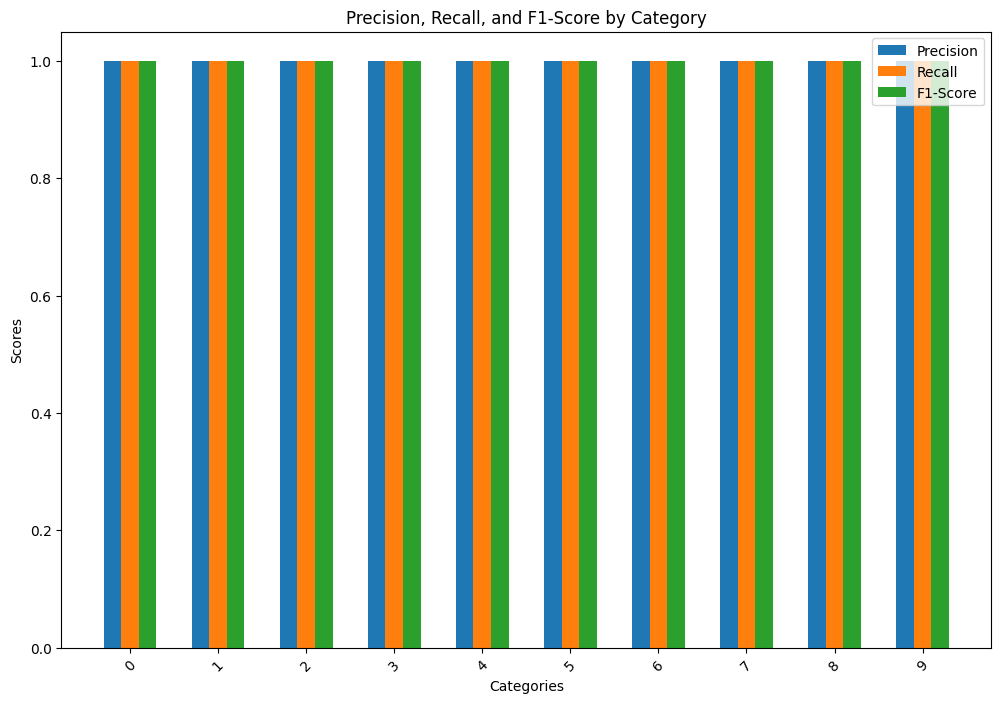

In [135]:
def plot_metrics(metrics):
    categories = list(metrics.keys())
    precision = [metrics[cat]['precision'] for cat in categories]
    recall = [metrics[cat]['recall'] for cat in categories]
    f1 = [metrics[cat]['f1'] for cat in categories]

    x = np.arange(len(categories))

    fig, ax = plt.subplots(figsize=(12, 8))

    ax.bar(x - 0.2, precision, 0.2, label='Precision')
    ax.bar(x, recall, 0.2, label='Recall')
    ax.bar(x + 0.2, f1, 0.2, label='F1-Score')

    ax.set_xlabel('Categories')
    ax.set_ylabel('Scores')
    ax.set_title('Precision, Recall, and F1-Score by Category')
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.legend()

    plt.xticks(rotation=45)
    plt.show()

plot_metrics(metrics)


In [136]:
import json
from collections import defaultdict

# Define the two JSON objects as strings
json_str1 = '''
[
    {"Company names": "Goldman Sachs", "People names": "None", "Specific topics": "global financial markets, interest rates, major economies, market trends, inflation rates, central bank policies", "General themes": "financial analysis, market predictions"},
    {"Company names": "European Central Bank", "People names": "Christine Lagarde", "Specific topics": "keynote speech, World Economic Forum, monetary policy, Eurozone, digital currencies, regulatory frameworks", "General themes": "economic policy, digital finance"},
    {"Company names": "Tesla", "People names": "Elon Musk", "Specific topics": "earnings report, record profit, electric vehicles, Asian market, battery technology, strategic market expansion", "General themes": "financial performance, technological advancement"},
    {"Company names": "Harvard Business Review", "People names": "None", "Specific topics": "remote work, productivity, employee well-being, telecommuting, benefits and challenges", "General themes": "workplace trends, employee health"},
    {"Company names": "Microsoft, Amazon Web Services", "People names": "None", "Specific topics": "strategic alliance, cloud computing solutions, healthcare sector, AI, machine learning, patient care, operational efficiency", "General themes": "technology collaboration, healthcare innovation"},
    {"Company names": "International Monetary Fund (IMF)", "People names": "None", "Specific topics": "global economic forecast, trade tensions, US and China, slower growth, major economies", "General themes": "economic outlook, international trade"},
    {"Company names": "Apple Inc.", "People names": "Tim Cook", "Specific topics": "latest iPhone model, advanced camera systems, A15 Bionic chip, product launch event", "General themes": "technology innovation, product launch"},
    {"Company names": "United Nations", "People names": "None", "Specific topics": "climate change report, environmental impacts, rising global temperatures, sea-level rise, extreme weather events", "General themes": "environmental sustainability, global warming"},
    {"Company names": "Google", "People names": "Sundar Pichai", "Specific topics": "search algorithm update, accuracy and relevance, search results, technical improvements, press briefing", "General themes": "technology enhancement, internet search"},
    {"Company names": "Amazon", "People names": "Jeff Bezos", "Specific topics": "increase in sales, holiday season, online shopping, company performance, future growth strategies", "General themes": "e-commerce trends, business growth"}
]
'''

json_str2 = '''
[
    {"Company names": ["Goldman Sachs"], "People names": [], "Specific topics": ["global financial markets, rise in interest rates, market trends, inflation rates, central bank policies"], "General themes": ["economic forecasting, interest rate changes, market analysis, inflation monitoring, central bank policy"]},
    {"Company names": [], "People names": ["Christine Lagarde"], "Specific topics": ["monetary policy", "Eurozone", "digital currencies", "regulatory frameworks"], "General themes": ["financial innovation", "regulation in finance"]},
    {"Company names": ["Tesla"], "People names": ["Elon Musk"], "Specific topics": ["Tesla's latest earnings report, record profit, electric vehicles, Asian market sales, advancements in battery technology, strategic market expansion"], "General themes": ["Corporate profitability, technological innovation, market strategy, economic impact of electric vehicles"]},
    {"Company names": [], "People names": [], "Specific topics": ["remote work", "productivity", "employee well-being", "telecommuting"], "General themes": ["Workplace flexibility", "Work-life balance", "Future of work"]},
    {"Company names": ["Microsoft, Amazon Web Services"], "People names": "", "Specific topics": ["Strategic alliance, cloud computing, healthcare sector, AI, machine learning, patient care, operational efficiency"], "General themes": ["Technology and healthcare, business collaboration"]},
    {"Company names": [], "People names": [], "Specific topics": ["trade tensions between the US and China", "IMF global economic forecast", "world's major economies"], "General themes": ["economic outlook", "global trade relations"]},
    {"Company names": ["Apple Inc."], "People names": ["Tim Cook"], "Specific topics": ["latest iPhone model, advanced camera systems, new A15 Bionic chip, product launch event"], "General themes": ["technology, innovation, smartphone industry"]},
    {"Company names": [], "People names": [], "Specific topics": ["climate change", "global temperatures", "sea-level rise", "frequency of extreme weather events"], "General themes": ["Environmental Impact", "Future Risks", "Immediate Action Needed"]},
    {"Company names": ["Google"], "People names": ["Sundar Pichai"], "Specific topics": ["search algorithm update", "improving accuracy and relevance of search results", "press briefing"], "General themes": ["technology", "innovation"]},
    {"Company names": ["Amazon"], "People names": ["Jeff Bezos"], "Specific topics": ["online shopping", "holiday season", "sales increase", "company performance", "future growth strategies"], "General themes": ["e-commerce", "retail business", "corporate strategy", "seasonal market trends"]}
]
'''

# Load the JSON objects
data1 = json.loads(json_str1)
data2 = json.loads(json_str2)

# Helper function to convert comma-separated strings to lists
def convert_to_list(obj):
    for key, value in obj.items():
        if isinstance(value, str):
            obj[key] = [item.strip() for item in value.split(',')]
        elif isinstance(value, list):
            obj[key] = [item.strip() for sublist in value for item in sublist.split(',')]
    return obj

# Convert the first JSON data to a comparable format
data1_converted = [convert_to_list(item) for item in data1]

# Function to compare the two data sets
def compare_data(data1, data2):
    differences = defaultdict(list)
    for item1, item2 in zip(data1, data2):
        for key in item1.keys():
            if set(item1[key]) != set(item2[key]):
                differences[key].append({'data1': item1[key], 'data2': item2[key]})
    return differences

# Perform the comparison
differences = compare_data(data1_converted, data2)

# Print the differences
for key, diff in differences.items():
    print(f"Differences in {key}:")
    for d in diff:
        print(f"  data1: {d['data1']}")
        print(f"  data2: {d['data2']}")
    print()


Differences in People names:
  data1: ['None']
  data2: []
  data1: ['None']
  data2: []
  data1: ['None']
  data2: 
  data1: ['None']
  data2: []
  data1: ['None']
  data2: []

Differences in Specific topics:
  data1: ['global financial markets', 'interest rates', 'major economies', 'market trends', 'inflation rates', 'central bank policies']
  data2: ['global financial markets, rise in interest rates, market trends, inflation rates, central bank policies']
  data1: ['keynote speech', 'World Economic Forum', 'monetary policy', 'Eurozone', 'digital currencies', 'regulatory frameworks']
  data2: ['monetary policy', 'Eurozone', 'digital currencies', 'regulatory frameworks']
  data1: ['earnings report', 'record profit', 'electric vehicles', 'Asian market', 'battery technology', 'strategic market expansion']
  data2: ["Tesla's latest earnings report, record profit, electric vehicles, Asian market sales, advancements in battery technology, strategic market expansion"]
  data1: ['remote work